In [25]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV ,RandomizedSearchCV
from sklearn.metrics import accuracy_score , recall_score, precision_score ,roc_auc_score , roc_curve ,auc, f1_score
from sklearn.metrics import classification_report

In [2]:
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  E mbarked    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic.Survived

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [7]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [8]:
X['Age'] = X['Age'].fillna(X['Age'].mode()[0])

C:\Users\rajdi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
X['Age'].mode()[0]

24.0

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [11]:
y.unique()

array([0, 1], dtype=int64)

In [12]:
print('THE NO OF UNIQUE VALUES :-')
print('--'*12)
for i in X.columns :
    unique = len(X[i].unique())
    print(i, '----->>  ' ,unique )

THE NO OF UNIQUE VALUES :-
------------------------
Pclass ----->>   3
Sex ----->>   2
Age ----->>   88
SibSp ----->>   7
Parch ----->>   7
Fare ----->>   248


In [13]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

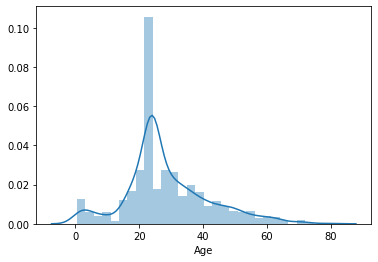

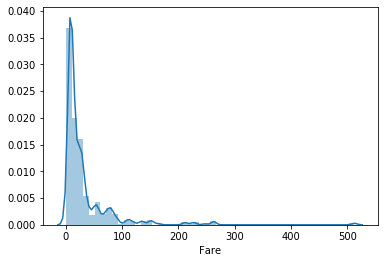

In [14]:
for i in ['Age','Fare']:
    sns.distplot(X[i])
    plt.show()

In [15]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,24.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [16]:
X = pd.get_dummies(X,drop_first=True, dtype= 'int64')

In [17]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Sex_male  891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [19]:
train_x, test_x, train_y, test_y = train_test_split(X,y, random_state = 234 , test_size = 0.3)

clf = DecisionTreeClassifier()

In [20]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
pred = clf.predict(test_x)

In [22]:
def score_df(model , test_x , test_y):
    pred = model.predict(test_x)
    accuracy = accuracy_score(test_y,pred)
    recall = recall_score(test_y,pred)
    precision= precision_score(test_y,pred)
    f1 = f1_score(test_y,pred)
    roc_auc_scores=roc_auc_score(test_y,pred)
    
    df = pd.DataFrame(index = ['accuracy_score', 'recall_score', 'precision_score', 'f1_score','roc_auc_score'], data = [accuracy,recall,precision,f1,roc_auc_scores])
    return df

In [23]:
score_df(clf , test_x, test_y)

,0
accuracy_score,0.791045
recall_score,0.740385
precision_score,0.726415
f1_score,0.733333
roc_auc_score,0.781778


In [44]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    'class_weight' :['balanced','None']
    
}

In [45]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1,verbose=3)
grid_search.fit(train_x,train_y)

Fitting 5 folds for each of 17280 candidates, totalling 86400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 12272 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 26608 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 45040 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 67568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 86385 out of 86400 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 86400 out of 86400 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'None'],
                 

In [46]:
best_parameters = grid_search.best_params_
best_parameters

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'splitter': 'random'}

In [47]:
final_model = DecisionTreeClassifier(class_weight='balanced',criterion='entropy', max_depth=11 , min_samples_leaf= 3 ,min_samples_split=7 , splitter='random')
final_model.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=11, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='random')

In [48]:
score_df(final_model, test_x, test_y)

,0
accuracy_score,0.794776
recall_score,0.778846
precision_score,0.716814
f1_score,0.746544
roc_auc_score,0.791862


- performence increased after applying grid search.

In [49]:
# Saving Model
filename = 'DecisionTreeClassifier.pickle'
pickle.dump(final_model, open(filename , 'wb'))

In [51]:
# load model 
load = pickle.load(open(filename , 'rb'))

In [71]:
# predicting 
l = list(test_x.loc[28])
load.predict([l])

array([1], dtype=int64)

In [72]:
# testing with the original values
test_y

725    0
566    0
661    0
709    1
251    0
      ..
200    0
811    0
173    0
134    0
28     1
Name: Survived, Length: 268, dtype: int64